# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [27]:
import pandas as pd

In [28]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [29]:
#Vocabulario del corpus
vocab = set()
for doc in documents:
    for word in doc.lower().strip('.,;:!?()"\'').split():
        vocab.add(word)
print('Vocabulary Lenght:', len(vocab))
print(vocab)

Vocabulary Lenght: 20
{'la', 'jugaron', 'perro', 'cómoda', 'limpia', 'estaba', 'gato', 'en', 'limpieza', 'y', 'importante', 'de', 'jardín', 'del', 'escondió', 'cama', 'se', 'es', 'debajo', 'el'}


### Vectorización TF de los documentos

In [30]:
dict_tf = {}
i = 0
for doc in documents:
    # Para cada documento se crea un diccionario TFD
    dict_tfd = {}
    for term in vocab:
        #contar las ocurrencias de cada term en el doc
        count = doc.lower().strip('.,;:!?()"\'').split().count(term)
        dict_tfd[term] = count
    dict_tf[i] = dict_tfd
    i += 1
print(dict_tf)

{0: {'la': 1, 'jugaron': 0, 'perro': 0, 'cómoda': 0, 'limpia': 0, 'estaba': 0, 'gato': 1, 'en': 0, 'limpieza': 0, 'y': 0, 'importante': 0, 'de': 1, 'jardín': 0, 'del': 0, 'escondió': 1, 'cama': 1, 'se': 1, 'es': 0, 'debajo': 1, 'el': 1}, 1: {'la': 1, 'jugaron': 0, 'perro': 0, 'cómoda': 1, 'limpia': 1, 'estaba': 1, 'gato': 0, 'en': 0, 'limpieza': 0, 'y': 1, 'importante': 0, 'de': 0, 'jardín': 0, 'del': 0, 'escondió': 0, 'cama': 1, 'se': 0, 'es': 0, 'debajo': 0, 'el': 0}, 2: {'la': 0, 'jugaron': 1, 'perro': 1, 'cómoda': 0, 'limpia': 0, 'estaba': 0, 'gato': 1, 'en': 1, 'limpieza': 0, 'y': 1, 'importante': 0, 'de': 0, 'jardín': 1, 'del': 0, 'escondió': 0, 'cama': 0, 'se': 0, 'es': 0, 'debajo': 0, 'el': 3}, 3: {'la': 1, 'jugaron': 0, 'perro': 0, 'cómoda': 0, 'limpia': 0, 'estaba': 0, 'gato': 0, 'en': 0, 'limpieza': 1, 'y': 0, 'importante': 1, 'de': 0, 'jardín': 1, 'del': 1, 'escondió': 0, 'cama': 0, 'se': 0, 'es': 1, 'debajo': 0, 'el': 0}}


In [31]:
# Convertir el diccionario a una matriz mediante pandas DataFrame
matriz = pd.DataFrame(dict_tf)
matriz.T

,la,jugaron,perro,cómoda,limpia,estaba,gato,en,limpieza,y,importante,de,jardín,del,escondió,cama,se,es,debajo,el
0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1
1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,3
3,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0


In [32]:
# Exportar la matriz a un archivo CSV
matriz.to_csv("Matriz_td.csv", index = True)

### Vectorización TF-IDF de los documentos

In [33]:
import math

vocab = sorted(vocab)
print('Vocabulary Length:', len(vocab))
print('Vocabulary:', vocab)

# Calculo de IDF para cada termino
idf = {}
total_docs = len(documents)

for term in vocab:
    doc_count = sum(1 for doc in documents if term in doc)
    if doc_count == 0:
        idf[term] = 0 
    else:
        idf[term] = math.log((total_docs) / (doc_count))

idf_series = pd.Series(idf)
print("\nIDF:")
print(idf_series)

# Calculo Matriz TF-IDF
tfidf = {}
for i in range(len(documents)):
    tfidf[i] = {}
    for term in vocab:
        tfidf[i][term] = dict_tf[i][term] * idf[term]

# convertir a dataFrame de pandas
tfidf_df = pd.DataFrame(tfidf).T
print("\nTF-IDF Matrix:")
tfidf_df
#print(tfidf_df)

Vocabulary Length: 20
Vocabulary: ['cama', 'cómoda', 'de', 'debajo', 'del', 'el', 'en', 'es', 'escondió', 'estaba', 'gato', 'importante', 'jardín', 'jugaron', 'la', 'limpia', 'limpieza', 'perro', 'se', 'y']

IDF:
cama          0.693147
cómoda        1.386294
de            0.693147
debajo        1.386294
del           1.386294
el            0.693147
en            1.386294
es            0.287682
escondió      1.386294
estaba        1.386294
gato          0.693147
importante    1.386294
jardín        0.693147
jugaron       1.386294
la            1.386294
limpia        1.386294
limpieza      1.386294
perro         1.386294
se            1.386294
y             0.693147
dtype: float64

TF-IDF Matrix:


,cama,cómoda,de,debajo,del,el,en,es,escondió,estaba,gato,importante,jardín,jugaron,la,limpia,limpieza,perro,se,y
0,0.693147,0.000000,0.693147,1.386294,0.000000,0.693147,0.000000,0.000000,1.386294,0.000000,0.693147,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,1.386294,0.000000
1,0.693147,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,1.386294,1.386294,0.000000,0.000000,0.000000,0.693147
2,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,1.386294,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,1.386294,0.000000,0.000000,0.000000,1.386294,0.000000,0.693147
3,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,1.386294,0.000000,1.386294,0.000000,0.000000,0.000000


### Gráfico de dispersión de los documentos en 2D

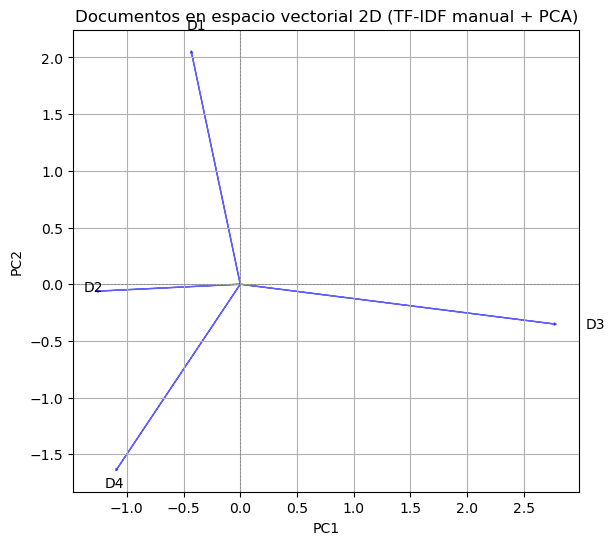

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# PCA sobre matriz TF-IDF
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(tfidf_df.values)

# Grafica
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

plt.title('Documentos en espacio vectorial 2D (TF-IDF manual + PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Gráfico de dispersión de los documentos en 3D

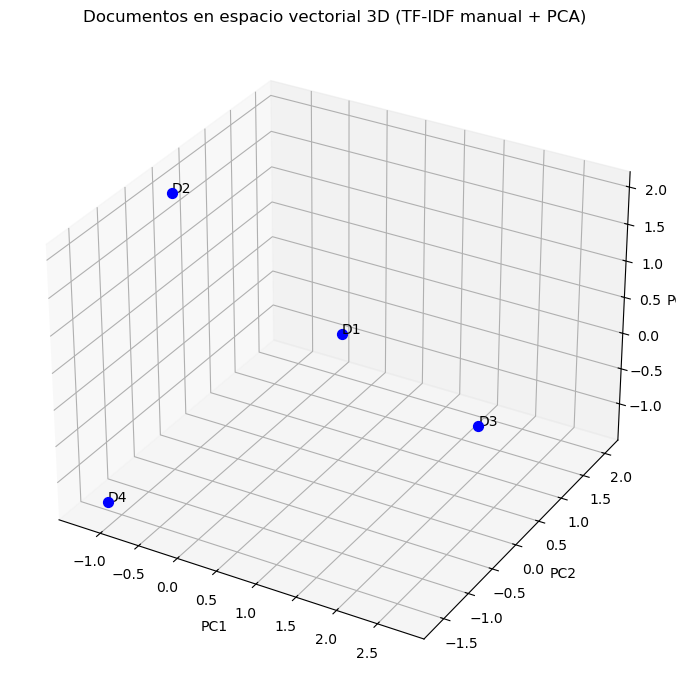

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reducción de dimensiones a 3 componentes
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(tfidf_df.values)

# Grafica en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, (x, y, z) in enumerate(docs_3d):
    ax.scatter(x, y, z, color='blue', s=50)
    ax.text(x, y, z, f'D{i+1}', fontsize=10)

ax.set_title('Documentos en espacio vectorial 3D (TF-IDF manual + PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

Similitud coseno entre consulta y documentos:
Documento 1: 0.2284
Documento 2: 0.0000
Documento 3: 0.2041
Documento 4: 0.0000


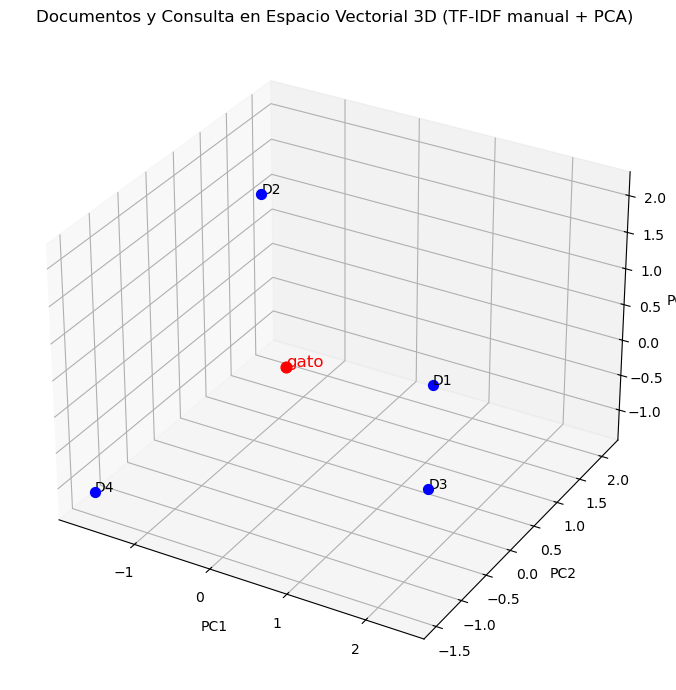

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D

# documentos
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# consulta
consulta = "gato"

# vocabulario y division de los documentos por palabras
vocab = set()
dict_tf = {}
processed_docs = []

for i in range(len(documents)):
    doc = documents[i]
    words = doc.lower().strip('.,;:!?()"\'').split()
    processed_docs.append(words)
    
    # agregar palabras al vocabulario
    for word in words:
        vocab.add(word)
    
    # Calcular TF para el documento
    tf_doc = {}
    for term in vocab:
        tf_doc[term] = words.count(term)
    
    dict_tf[i] = tf_doc

# extraer las palabras de la consulta y agregarlas al vocabulario
consulta_words = consulta.lower().strip('.,;:!?()"\'').split()
for word in consulta_words:
    vocab.add(word)

# Ordenar vocabulario alfabeticamente
vocab = sorted(vocab)

# Recalcular TF con las palabras de la consulta ya en el vocabulario
for i in range(len(documents)):
    tf_doc = {}
    words = processed_docs[i]
    for term in vocab:
        tf_doc[term] = words.count(term)
    dict_tf[i] = tf_doc

# matriz TF
tf_df = pd.DataFrame(dict_tf).T.fillna(0)

# calcular IDF
total_docs = len(documents)
idf = {}

for term in vocab:
    doc_count = 0
    for words in processed_docs:
        if term in words:
            doc_count += 1
    
    if doc_count > 0:
        idf_value = math.log(total_docs / doc_count)
    else:
        idf_value = 0

    idf[term] = idf_value

#  matriz TF-IDF
tfidf = {}

for i in range(len(documents)):
    tfidf_doc = {}
    for term in vocab:
        tf = dict_tf[i][term]
        tfidf_doc[term] = tf * idf[term]
    tfidf[i] = tfidf_doc

tfidf_df = pd.DataFrame(tfidf).T.fillna(0)

# TF-IDF para la consulta
query_tf = {}
for term in vocab:
    count = 0
    for word in consulta_words:
        if word == term:
            count += 1
    query_tf[term] = count

query_tfidf = {}
for term in vocab:
    tf = query_tf[term]
    idf_value = idf.get(term, 0)
    query_tfidf[term] = tf * idf_value

query_series = pd.Series(query_tfidf)

# similitud coseno
similitudes = cosine_similarity([query_series.values], tfidf_df.values)[0]

print('Similitud coseno entre consulta y documentos:')
for i in range(len(similitudes)):
    print(f'Documento {i+1}: {similitudes[i]:.4f}')

# reducción con PCA a 3 dimensiones
tfidf_df_all = pd.concat([tfidf_df, query_series.to_frame().T], ignore_index=True)
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(tfidf_df_all.values)

docs_coords = docs_3d[:-1]
query_coord = docs_3d[-1]

# visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# documentos
for i in range(len(docs_coords)):
    x, y, z = docs_coords[i]
    ax.scatter(x, y, z, color='blue', s=50)
    ax.text(x, y, z, f'D{i+1}', fontsize=10)

# consulta
xq, yq, zq = query_coord
ax.scatter(xq, yq, zq, color='red', s=60)
ax.text(xq, yq, zq, f'{consulta}', color='red', fontsize=12)

ax.set_title('Documentos y Consulta en Espacio Vectorial 3D (TF-IDF manual + PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ranking de documentos por similitud:
Documento 1 Similitud = 0.2284 → "El gato se escondió debajo de la cama."
Documento 3 Similitud = 0.2041 → "El perro y el gato jugaron en el jardín."
Documento 2 Similitud = 0.0000 → "La cama estaba limpia y cómoda."
Documento 4 Similitud = 0.0000 → "La limpieza del jardín es importante."


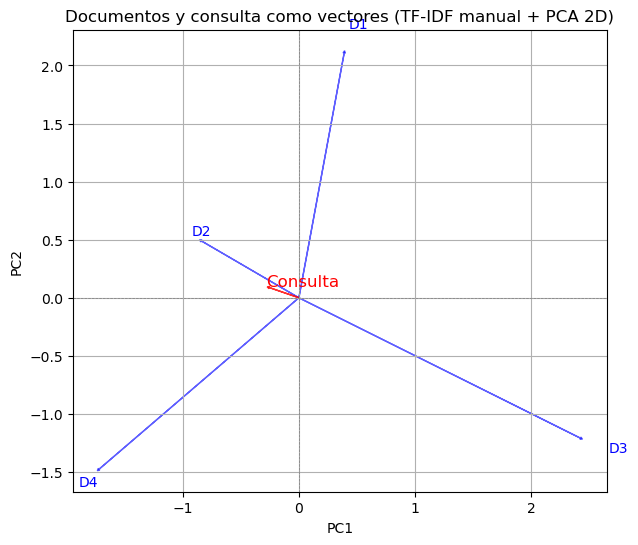

In [37]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# documentos
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# consulta
consulta = "gato"

# vocabulario y division de los documentos por palabras
vocab = set()
dict_tf = {}
processed_docs = []

for i in range(len(documents)):
    doc = documents[i]
    words = doc.lower().strip('.,;:!?()"\'').split()
    processed_docs.append(words)
    
    for word in words:
        vocab.add(word)
    
    tf_doc = {}
    for term in vocab:
        tf_doc[term] = words.count(term)
    dict_tf[i] = tf_doc

# extraer las palabras de la consulta y agregarlas al vocabulario
consulta_words = consulta.lower().strip('.,;:!?()"\'').split()
for word in consulta_words:
    vocab.add(word)

vocab = sorted(vocab)

# Recalcular TF con las palabras de la consulta ya en el vocabulario
for i in range(len(documents)):
    tf_doc = {}
    words = processed_docs[i]
    for term in vocab:
        tf_doc[term] = words.count(term)
    dict_tf[i] = tf_doc

# matriz TF
tf_df = pd.DataFrame(dict_tf).T.fillna(0)

# calcular IDF
total_docs = len(documents)
idf = {}

for term in vocab:
    doc_count = 0
    for words in processed_docs:
        if term in words:
            doc_count += 1
    if doc_count > 0:
        idf_value = math.log(total_docs / doc_count)
    else:
        idf_value = 0
    idf[term] = idf_value

# TF-IDF para documentos
tfidf = {}
for i in range(len(documents)):
    tfidf_doc = {}
    for term in vocab:
        tf = dict_tf[i].get(term, 0)
        tfidf_doc[term] = tf * idf[term]
    tfidf[i] = tfidf_doc

tfidf_df = pd.DataFrame(tfidf).T.fillna(0)

# TF-IDF para la consulta
query_tf = {}
for term in vocab:
    count = 0
    for word in consulta_words:
        if word == term:
            count += 1
    query_tf[term] = count

query_tfidf = {}
for term in vocab:
    tf = query_tf[term]
    idf_value = idf.get(term, 0)
    query_tfidf[term] = tf * idf_value

query_vector = pd.Series(query_tfidf)

# calcular similitud coseno
similitudes = cosine_similarity([query_vector.values], tfidf_df.values)[0]

# mostrar ranking de documentos
ranking = []
for i in range(len(similitudes)):
    ranking.append((i, similitudes[i]))

# Ordenar ranking de mayor a menor
for i in range(len(ranking)):
    for j in range(i+1, len(ranking)):
        if ranking[j][1] > ranking[i][1]:
            ranking[i], ranking[j] = ranking[j], ranking[i]

print("Ranking de documentos por similitud:")
for i in range(len(ranking)):
    idx = ranking[i][0]
    score = ranking[i][1]
    print("Documento", idx + 1, f"Similitud = {score:.4f} → \"{documents[idx]}\"")

# PCA a 2 dimensiones
all_vectors = tfidf_df.copy()
all_vectors.loc[len(all_vectors)] = query_vector
pca = PCA(n_components=2)
X_2d = pca.fit_transform(all_vectors.values)

docs_2d = X_2d[:-1]
query_2d = X_2d[-1]

# visualización en 2D
plt.figure(figsize=(10, 6))

# documentos
for i in range(len(docs_2d)):
    x = docs_2d[i][0]
    y = docs_2d[i][1]
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, color='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10, color='blue')

# consulta
qx = query_2d[0]
qy = query_2d[1]
plt.arrow(0, 0, qx, qy, head_width=0.02, head_length=0.02, color='red', alpha=0.8)
plt.text(qx * 1.1, qy * 1.1, 'Consulta', fontsize=12, color='red')

plt.title("Documentos y consulta como vectores (TF-IDF manual + PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
